# SDA Project

**Our goal in this project is to determine which prepaid plan brings in more revenue**

## Study and prepare the datasets


In [1]:
# Reviewer's code
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
try:
    megaline_calls = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 3 - Statistics\megaline_calls.csv")
except:
    megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [4]:
try:
    megaline_internet = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 3 - Statistics\megaline_internet.csv")
except:
    megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [5]:
try:
    megaline_messages = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 3 - Statistics\megaline_messages.csv")
except:
    megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [6]:
try:
    megaline_plans = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 3 - Statistics\megaline_plans.csv")
except:
    megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [7]:
try:
    megaline_users = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 3 - Statistics\megaline_users.csv")
except:
    megaline_users = pd.read_csv('/datasets/megaline_users.csv')

In [8]:
def study(i):
    print(i.head())
    print('-----------------------------')
    print(i.info())
    print('-----------------------------')
    print(i.describe())

**Above we can see that for our project we use multiple datasets, We will probably merge specific data from each dataset to one dataset which will be called 'data'**

### Megaline calls data

In [9]:
study(megaline_calls)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
-----------------------------
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%    

In [10]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'],format=('%Y-%m-%d'))

In [11]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [12]:
print('Percentage of missed calls: {:.0%}'.format(len(megaline_calls[megaline_calls['duration']==0])/len(megaline_calls)))

Percentage of missed calls: 19%


* I converted the data type of call_date to be datetime
* I have found a large amount of zeros in duration column, we'll leave it as it is because the zeros are called that the users didn't pick up.

### Megalin internet data

In [13]:
study(megaline_internet)

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
-----------------------------
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     

In [14]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'],format=('%Y-%m-%d'))

In [15]:
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [16]:
print('Percentage of session with 0.0 mb_used: {:.2%}'.format(len(megaline_internet[megaline_internet['mb_used']==0]['user_id'].value_counts())/len(megaline_internet)))

Percentage of session with 0.0 mb_used: 0.46%


In [17]:
megaline_internet = megaline_internet[megaline_internet['mb_used']!=0]
print('Percentage of session with 0.0 mb_used after removing them: {:.0%}'.format(len(megaline_internet[megaline_internet['mb_used']==0])))

Percentage of session with 0.0 mb_used after removing them: 0%


* I converted the session date column to be datetime type
* Removed the session with mb_used of 0.0

### Megalin messages data

In [18]:
study(megaline_messages)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
-----------------------------
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [19]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'],format=('%Y-%m-%d'))
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


* I converted the message date to datetime type

### Megalin plans data

In [20]:
study(megaline_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 

In [21]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Megalin users data

In [22]:
study(megaline_users)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2 

In [23]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'],format=('%Y-%m-%d'))
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'],format=('%Y-%m-%d'),errors='ignore')
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


* I convert both churn_date and reg_date to datetime type

In [24]:
calls = megaline_calls
internet = megaline_internet
messages = megaline_messages
plans = megaline_plans
users = megaline_users

* I renamed the datasets so it will be easier to access each dataset

### Calculate the number of calls made and minutes used per month

In [25]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [26]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [27]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [28]:
calls_group = calls.pivot_table(values='duration', index=['user_id','month'],aggfunc=['count','sum'])
calls_group.reset_index(inplace=True)
calls_group.columns = ['user_id','month','calls','duration']
calls_group.head()

,user_id,month,calls,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


### Calculate the number of text messages sent per month

In [29]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [30]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [31]:
messages_group = messages.pivot_table(values='message_date',index=['user_id','month'],aggfunc='count')
messages_group.reset_index(inplace=True)
messages_group.columns = ['user_id','month','messages']
messages_group.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


### Calculate the volume of data per month

In [32]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


In [33]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8


In [34]:
internet_group = internet.pivot_table(values='mb_used', index=['user_id','month'],aggfunc='sum')
internet_group.reset_index(inplace=True)
internet_group.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


### Calculate the monthly revenue from each user

**Merge our grouped data**

In [35]:
data = pd.merge(left=internet_group, right=calls_group, how='outer', on=['user_id','month']).fillna(0)
data = pd.merge(left=data, right=messages_group, how='outer', on=['user_id','month']).fillna(0)
data = pd.merge(left=data, right=users, how='outer',on=['user_id'])
data.head()

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,1901.47,16.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8.0,6919.15,27.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9.0,13314.82,49.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10.0,22330.49,65.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11.0,18504.30,64.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT


In [36]:
data[data['month'].isnull()]

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date
2293,1025,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT
2294,1129,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
2295,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT
2296,1269,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
2297,1275,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
2298,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT
2299,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
2300,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT
2301,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT
2302,1473,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT


In [37]:
len(data[data['month'].isnull()])/len(data)
print('Percentage of NaN values in month column is: {:%}'.format(len(data[data['month'].isnull()])/len(data)))

Percentage of NaN values in month column is: 0.434216%


In [38]:
data = data[data['month'].notna()]
data.month.isnull().sum()

0

In [39]:
data.plan.unique()

array(['ultimate', 'surf'], dtype=object)

**Surf**
* Monthly charge: $20

* 500 monthly minutes, 50 texts, and 15 GB of data

* After exceeding the package limits:

* 1 minute: 3 cents

* 1 text message: 3 cents

* 1 GB of data: $10

**Ultimate**
* Monthly charge: $70

* 3000 monthly minutes, 1000 text messages, and 30 GB of data

* After exceeding the package limits:

* 1 minute: 1 cents

* 1 text message: 1 cents

* 1 GB of data: $7

In [40]:
def cost(row):
    plan = row['plan']
    mb = row['mb_used']
    minutes = row['duration']
    messages = row['messages']
    

    #Costs for Surf users:
    if plan=='surf':
        monthly_charge=20
        
        if minutes > 500:
            minutes_charge=(minutes - 500)*0.03
        else:
            minutes_charge=0
        
        if messages > 50:
            messages_charge=(messages - 50)*0.03
        else:
            messages_charge=0
        
        if (mb/1024) > 15:
            mb_charge=(mb/1024 - 15)*10
        else:
            mb_charge=0
    
    #Cost for Ultimate users:
    else:
        monthly_charge=70
      
        if minutes > 3000:
            minutes_charge=(minutes - 3000) * 0.01
        else:
            minutes_charge=0
        
        if messages > 1000:
            messages_charge=(messages - 1000) * 0.01
        else:
            messages_charge=0
        
        if (mb/1024) > 30:
            mb_charge=(mb/1024 - 30)*7
        else:
            mb_charge=0
    total_cost=monthly_charge+minutes_charge+messages_charge+mb_charge
    return total_cost

In [41]:
data['total_cost']=data.apply(cost,axis=1)
data

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,1901.47,16.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.000000
1,1001,8.0,6919.15,27.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
2,1001,9.0,13314.82,49.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
3,1001,10.0,22330.49,65.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,88.161191
4,1001,11.0,18504.30,64.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,8.0,0.00,84.0,580.0,141.0,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaT,25.130000
2289,1470,9.0,0.00,70.0,471.0,130.0,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaT,22.400000
2290,1470,10.0,0.00,72.0,459.0,145.0,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaT,22.850000
2291,1470,11.0,0.00,81.0,632.0,156.0,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaT,27.140000


In [42]:
data.duplicated().sum()

0

In [43]:
data.head()

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,1901.47,16.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.000000
1,1001,8.0,6919.15,27.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
2,1001,9.0,13314.82,49.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
3,1001,10.0,22330.49,65.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,88.161191
4,1001,11.0,18504.30,64.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50.706055


**Conclusion**

* Added some calculation for each user: text per month, minutes per month, data used per month.

* Checked for duplicated rows

* Removed rows with missing values (except churn_date)

## Analyze the data

In [44]:
surf_users = data.query('plan=="surf"')
surf_users.head()

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
1,1001,8.0,6919.15,27.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
2,1001,9.0,13314.82,49.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.000000
3,1001,10.0,22330.49,65.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,88.161191
4,1001,11.0,18504.30,64.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50.706055
5,1001,12.0,19369.18,56.0,412.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,59.152148


In [45]:
ultimate_users = data.query('plan=="ultimate"')
ultimate_users.head()

,user_id,month,mb_used,calls,duration,messages,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,1901.47,16.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.000000
19,1006,11.0,2068.37,2.0,10.0,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,70.000000
20,1006,12.0,32118.82,9.0,59.0,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,79.562246
26,1008,10.0,17106.99,71.0,476.0,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,70.000000
27,1008,11.0,23676.72,63.0,446.0,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,70.000000


**Analyze minutes per month**

In [46]:
surf_users.describe()

,user_id,month,mb_used,calls,duration,messages,age,total_cost
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,16558.283490,59.811825,428.749523,31.159568,44.379530,57.672846
std,139.227939,2.468199,8013.513327,32.017989,234.453150,33.566717,16.646535,53.860388
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000
25%,1120.000000,8.000000,11986.520000,39.000000,272.000000,3.000000,29.000000,20.000000
50%,1245.000000,10.000000,16829.310000,60.000000,425.000000,24.000000,45.000000,37.383477
75%,1358.000000,11.000000,20999.610000,79.000000,576.000000,47.000000,59.000000,77.120605
max,1499.000000,12.000000,70931.590000,205.000000,1510.000000,266.000000,75.000000,583.061309


In [47]:
surf_duration_up = np.percentile(surf_users['duration'],98)
surf_duration_low = np.percentile(surf_users['duration'],2)
ultimate_duration_up = np.percentile(ultimate_users['duration'],98)
ultimate_duration_low = np.percentile(ultimate_users['duration'],2)

In [48]:
surf_duration = surf_users.pivot_table(values='duration',index='user_id',aggfunc=['mean','var','std'])
surf_duration.reset_index(inplace=True)
surf_duration.columns = ['user_id','mean','var','std']
surf_duration

,user_id,mean,var,std
0,1001,345.600000,10205.300000,101.021285
1,1002,276.333333,35426.333333,188.218844
2,1003,1104.000000,NaN,NaN
3,1004,346.500000,7940.571429,89.109884
4,1005,496.000000,NaN,NaN
...,...,...,...,...
328,1494,473.500000,9820.300000,99.097427
329,1495,441.250000,18960.916667,137.698644
330,1496,291.000000,11166.000000,105.669295
331,1498,291.909091,2480.490909,49.804527


In [49]:
ultimate_duration = ultimate_users.pivot_table(values='duration',index='user_id',aggfunc=['mean','var','std'])
ultimate_duration.reset_index(inplace=True)
ultimate_duration.columns = ['user_id','mean','var','std']
ultimate_duration

,user_id,mean,var,std
0,1000,124.000000,NaN,NaN
1,1006,34.500000,1200.500000,34.648232
2,1008,518.666667,10201.333333,101.001650
3,1011,415.285714,21983.904762,148.269703
4,1013,219.000000,NaN,NaN
...,...,...,...,...
152,1482,280.333333,191800.333333,437.950149
153,1487,416.000000,NaN,NaN
154,1490,373.000000,25040.800000,158.242851
155,1493,465.000000,3518.500000,59.316945


**The NaN values in the columns var and std inside the pivot tables above are caused by users who only had one month of subscription to a calling plan**

In [50]:
# Reviewer's code
print(ultimate_users['duration'].mean())
print(ultimate_users['duration'].var())
print(ultimate_users['duration'].std())

430.45
57844.4648122392
240.50876244378125


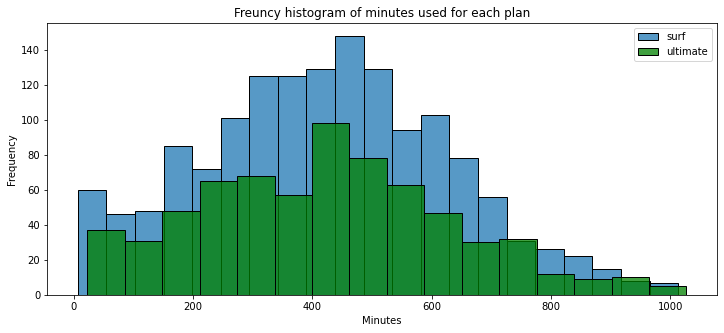

In [51]:
surf_users = surf_users.query('duration > @surf_duration_low and duration < @surf_duration_up')
ultimate_users = ultimate_users.query('duration > @ultimate_duration_low and duration < @ultimate_duration_up')
plt.figure(figsize=(12,5))
sns.histplot(data=surf_users, x='duration',label='surf')
sns.histplot(data=ultimate_users,x='duration',color='g',label='ultimate')
plt.gca().set(title='Freuncy histogram of minutes used for each plan', ylabel='Frequency',xlabel='Minutes')
plt.legend()

**We can see that the distribution of calls duration for both plans are very similar, the only difference is the overall minutes amount. This can be explained by the fact that there are less users subsribed with the ultimate calling plan**

**Analyze texts per month**

In [52]:
surf_messages = surf_users.pivot_table(values='messages',index='user_id',aggfunc=['mean','var','std'])
surf_messages.reset_index(inplace=True)
surf_messages.columns = ['user_id','mean','var','std']
surf_messages

,user_id,mean,var,std
0,1001,41.400000,76.800000,8.763561
1,1002,29.333333,174.333333,13.203535
2,1004,22.125000,51.553571,7.180082
3,1005,11.000000,NaN,NaN
4,1007,51.000000,22.500000,4.743416
...,...,...,...,...
319,1494,29.000000,56.400000,7.509993
320,1495,0.000000,0.000000,0.000000
321,1496,13.000000,53.500000,7.314369
322,1498,0.000000,0.000000,0.000000


In [53]:
ultimate_messages = ultimate_users.pivot_table(values='messages',index='user_id',aggfunc=['mean','var','std'])
ultimate_messages.reset_index(inplace=True)
ultimate_messages.columns = ['user_id','mean','var','std']
ultimate_messages

,user_id,mean,var,std
0,1000,11.0,NaN,NaN
1,1006,139.0,NaN,NaN
2,1008,28.0,67.0,8.185353
3,1011,53.0,214.0,14.628739
4,1013,16.0,NaN,NaN
...,...,...,...,...
149,1482,46.0,3362.0,57.982756
150,1487,66.0,NaN,NaN
151,1490,0.0,0.0,0.000000
152,1493,0.0,0.0,0.000000


**The NaN values in the columns var and std inside the pivot tables above are caused by users who only had one month of subscription to a calling plan**

In [54]:
surf_messages_up = np.percentile(surf_users['messages'],98)
surf_messages_low = np.percentile(surf_users['messages'],2)
ultimate_messages_up = np.percentile(ultimate_users['messages'],98)
ultimate_messages_low = np.percentile(ultimate_users['messages'],2)

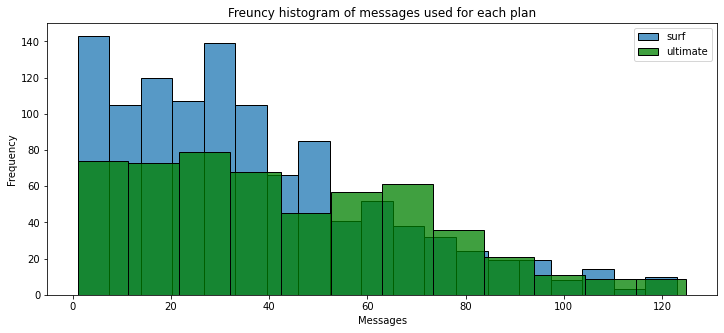

In [55]:
surf_users = surf_users.query('messages > @surf_messages_low and messages < @surf_messages_up')
ultimate_users = ultimate_users.query('messages > @ultimate_messages_low and messages < @ultimate_messages_up')
plt.figure(figsize=(12,5))
sns.histplot(data=surf_users, x='messages',label='surf')
sns.histplot(data=ultimate_users,x='messages',color='g',label='ultimate')
plt.gca().set(title='Freuncy histogram of messages used for each plan', ylabel='Frequency',xlabel='Messages')
plt.legend()

**We can see that the distribution of messages for both plans are very similar, the only difference is the overall messages amount. This can be explained by the fact that there are less users subscribed with the ultimate calling plan.
Same as the minutes per user**

**Analyze data volume per user_id**

In [56]:
surf_mb_used = surf_users.pivot_table(values='mb_used',index='user_id',aggfunc=['mean','var','std'])
surf_mb_used.reset_index(inplace=True)
surf_mb_used.columns = ['user_id','mean','var','std']
surf_mb_used

,user_id,mean,var,std
0,1001,16087.588000,3.683292e+07,6069.012812
1,1002,13431.110000,4.161427e+07,6450.912102
2,1004,19544.101250,4.290587e+07,6550.257286
3,1005,17140.170000,NaN,NaN
4,1007,28770.548000,3.050742e+07,5523.352540
...,...,...,...,...
257,1489,15248.937500,5.281780e+06,2298.212343
258,1491,7005.630000,1.029130e+07,3208.006279
259,1492,10205.990000,3.321336e+07,5763.103209
260,1494,15231.531667,7.081829e+06,2661.170686


In [57]:
ultimate_mb_used = ultimate_users.pivot_table(values='mb_used',index='user_id',aggfunc=['mean','var','std'])
ultimate_mb_used.reset_index(inplace=True)
ultimate_mb_used.columns = ['user_id','mean','var','std']
ultimate_mb_used

,user_id,mean,var,std
0,1000,1901.470000,NaN,NaN
1,1008,18491.013333,2.162994e+07,4650.799414
2,1011,18825.514286,3.445490e+07,5869.829757
3,1013,20113.920000,NaN,NaN
4,1026,6612.230000,6.407341e+06,2531.272571
...,...,...,...,...
122,1477,23269.075000,4.403752e+07,6636.076933
123,1478,16538.128000,2.040804e+07,4517.526238
124,1482,10403.065000,1.937589e+08,13919.729328
125,1487,13992.390000,NaN,NaN


**The NaN values in the columns var and std inside the pivot tables above are caused by users who only had one month of subscription to a calling plan**

In [58]:
surf_mb_used_up = np.percentile(surf_users['mb_used'],98)
surf_mb_used_low = np.percentile(surf_users['mb_used'],2)
ultimate_mb_used_up = np.percentile(ultimate_users['mb_used'],98)
ultimate_mb_used_low = np.percentile(ultimate_users['mb_used'],2)

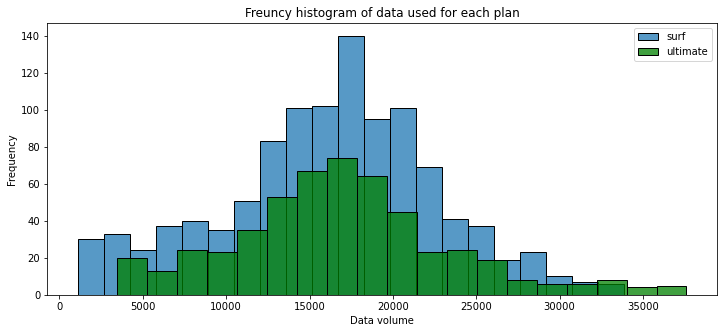

In [59]:
surf_users = surf_users.query('mb_used > @surf_mb_used_low and mb_used < @surf_mb_used_up')
ultimate_users = ultimate_users.query('mb_used > @ultimate_mb_used_low and mb_used < @ultimate_mb_used_up')
plt.figure(figsize=(12,5))
sns.histplot(data=surf_users, x='mb_used',label='surf')
sns.histplot(data=ultimate_users,x='mb_used',color='g',label='ultimate')
plt.gca().set(title='Freuncy histogram of data used for each plan', ylabel='Frequency',xlabel='Data volume')
plt.legend()

**The frequncy histogram above showing is pretty close the a normal distribution**
In addition, the distribution for both calling plans are pretty similar and again, ultimate ing general have less users comparing the surf plan

## Test the hypotheses

**The average revenue from users of Ultimate and Surf calling plans differs.**

In [60]:
from scipy import stats as st
import random

**From the results we get for each plan users average revenue my prediction is that the null hypotheis will be rejected.
We will make a stat test to make sure of it**

In [61]:
# The null hypothesis

alpha = 0.05
results = st.ttest_ind(surf_users['total_cost'],ultimate_users['total_cost'])
print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.619661570592712e-29
We reject the null hypothesis


**The result of the t-test is a clear evidence that the users revenue of each plan differs.
Our next step will be to determine which of the plan has a bigger revenue on average, we'll do that by checking which median has a greater value**

In [62]:
surf_rev_median = surf_users['total_cost'].median()
ultimate_rev_median = ultimate_users['total_cost'].median()
if surf_rev_median > ultimate_rev_median:
    print('The surf plan average revenue is greater then the ultimate plan')
else:
    print('The ultimate plan average revenue is greater then the surf plan')

The ultimate plan average revenue is greater then the surf plan


**Our second hypothesis us that The average revenue from users in NY-NJ area is different from that of the users from other regions.
We'll use stat test again on different values**

In [63]:
NY_NJ_users = data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
not_NY_NJ_users = data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [64]:
alpha = 0.05 

results_2 = st.ttest_ind(NY_NJ_users['total_cost'],not_NY_NJ_users['total_cost'])

print('p-value:',results_2.pvalue)

if (results_2.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")


p-value: 0.028079927103623847
We reject the null hypothesis


**Our results from the stat test show us that there is no significant difference between users from the NY-NJ area to other areas.**

## Overall conclusion

**Ultimate calling plan brings more revenue on average comparing to the surf calling plan.
An impossible reason to the fact that the ulitmate plan has a significant larger revenue (comparing to the surf plan) is the monthly charge which is cost more then twice then the surf plan.
Further investigation can be with investigate the users age, which maybe affect the revenue.**